# Circuit Generation for Surface Codes

Surface Codes are CSS codes which encode logical states in a two dimensional lattice of qubits. Syndromes are measured along all the different squares as $X_1 X_2 Z_1 Z_2$ on each edge.

The graph below is a surface code patch of distance d=3 such that number of qubits required is $d^2$ and number of syndrom qubits required is $d^2-1$. Here, blue patches are Z stabilizers and red patches are X stabilizers. Z stabilizers entangle qubits on data qubits (grey) in corners as control, with syndrome qubits (black) in the centre as target.

Similarly, X stabilizers entangle qubits with controlled not on data qubits (grey) in corners as target, with syndrome qubits (black) in the centre as control. The Z and N marked in each patch determines the order of CX labeled in black. Grey coordinate labels are data qubit locations and black labels are syndrome qubit locations.

The straight line marked Z<sub>L</sub> signifies that a logical Z is applied by operating Z on each qubit, on any horizontal line in the lattice. Similarly, the straight line marked X<sub>L</sub> signifies that a logical X is applied by operating X on each qubit, on any vertical line in the lattice. We choose one convention and say top edge signifies a Z logical operation and left edge signifies X logical operation! 

<p align="center">
<img width="672" alt="Lattice" src="https://user-images.githubusercontent.com/293681/86267952-7541f700-bb95-11ea-8292-240bf344f7f8.png">
</p>

The code assigns node locations to the lattices using `SurfaceCode(d, T).lattice()` and then assigns the order of controlled not for each square using `SurfaceCode(d, T).connection()`. This is then used by the syndrome measurement to apply controlled nots for each square according to the numbers and type of stabilizer the square execute (red: X, blue:Z). 

Thus, the above circuit is created and each syndrome qubit is measured. This is called syndrome measurement and is repeated T=d times. The results from each syndrome measurement are then processed to extract error nodes i.e. nodes which were flipped in consecutive syndrome measurements. This information is then utilised by the classes in syndrome_graph and fitter.py files to create error graphs and perform matching (see the [decoder tutorial](2_surface_code_decoding.ipynb)) to deduce the most probable error.

Finally, logical Z error is concluded by checking if there were odd number of qubits with errors on top (Z<sub>L</sub>) edge and logical X error is concluded if there odd number of qubits with errors on the left (X<sub>L</sub>) edge

#   Circuit Execution (Logical 0)


In [5]:
from qiskit import execute

try:
    from qiskit import Aer

    HAS_AER = True
except ImportError:
    from qiskit import BasicAer

    HAS_AER = False
    
if HAS_AER:
    simulator = Aer.get_backend('qasm_simulator')
else:
    simulator = BasicAer.get_backend('qasm_simulator')

In [6]:
import sys
sys.path.insert(0, 'circuits.py')
from circuits import SurfaceCode

# Set up a d=3, T=3 code
code = SurfaceCode(3, 3)
job = execute(code.circuit['0'], simulator)

raw_results = {}
raw_results['0'] = job.result().get_counts()

processed_results={}
processed_results=code.process_results(raw_results['0'])

j=0
for i in (processed_results):
    print("results from circuit execution round",j,":", processed_results[2])
    j=j+1
    
nodesX,nodesZ = code.extract_nodes(processed_results)
print("error nodes in X", nodesX)
print("error nodes in Z", nodesZ)
print("No Z error as logical 0 state is an eigenstate of logical Z (given no noise is added to the system)")

results from circuit execution round 0 : [0, 0, 0, 0, 0, 0, 0, 0]
results from circuit execution round 1 : [0, 0, 0, 0, 0, 0, 0, 0]
results from circuit execution round 2 : [0, 0, 0, 0, 0, 0, 0, 0]
results from circuit execution round 3 : [0, 0, 0, 0, 0, 0, 0, 0]
error nodes in X [(2, -0.5, 0.5), (2, 1.5, 0.5), (2, 2.5, 1.5)]
error nodes in Z []
No Z error as logical 0 state is an eigenstate of logical Z (given no noise is added to the system)


/tmp/ipykernel_32057/1246980389.py:7: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(code.circuit['0'], simulator)


# Visualize the SurfaceEncoder Circuit

Each round of the syndrome measurement runs the following measurements between the ancilla qubits on top and the N,S,E,W data qubits:

<p align="center">
<img width="549" alt="Screen Shot 2020-07-01 at 3 43 38 PM" src="https://user-images.githubusercontent.com/293681/86285090-02934480-bbb2-11ea-8b18-57eda706b206.png">
</p>

- Wang, D. S., Fowler, A. G., Stephens, A. M. & Hollenberg, L. C. L. Threshold error rates for the toric and surface codes. arXiv:0905.0531 [quant-ph] (2009).

We can visualize the output of the "linearized" circuit in Qiskit (below):

/home/dustinseboldt/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


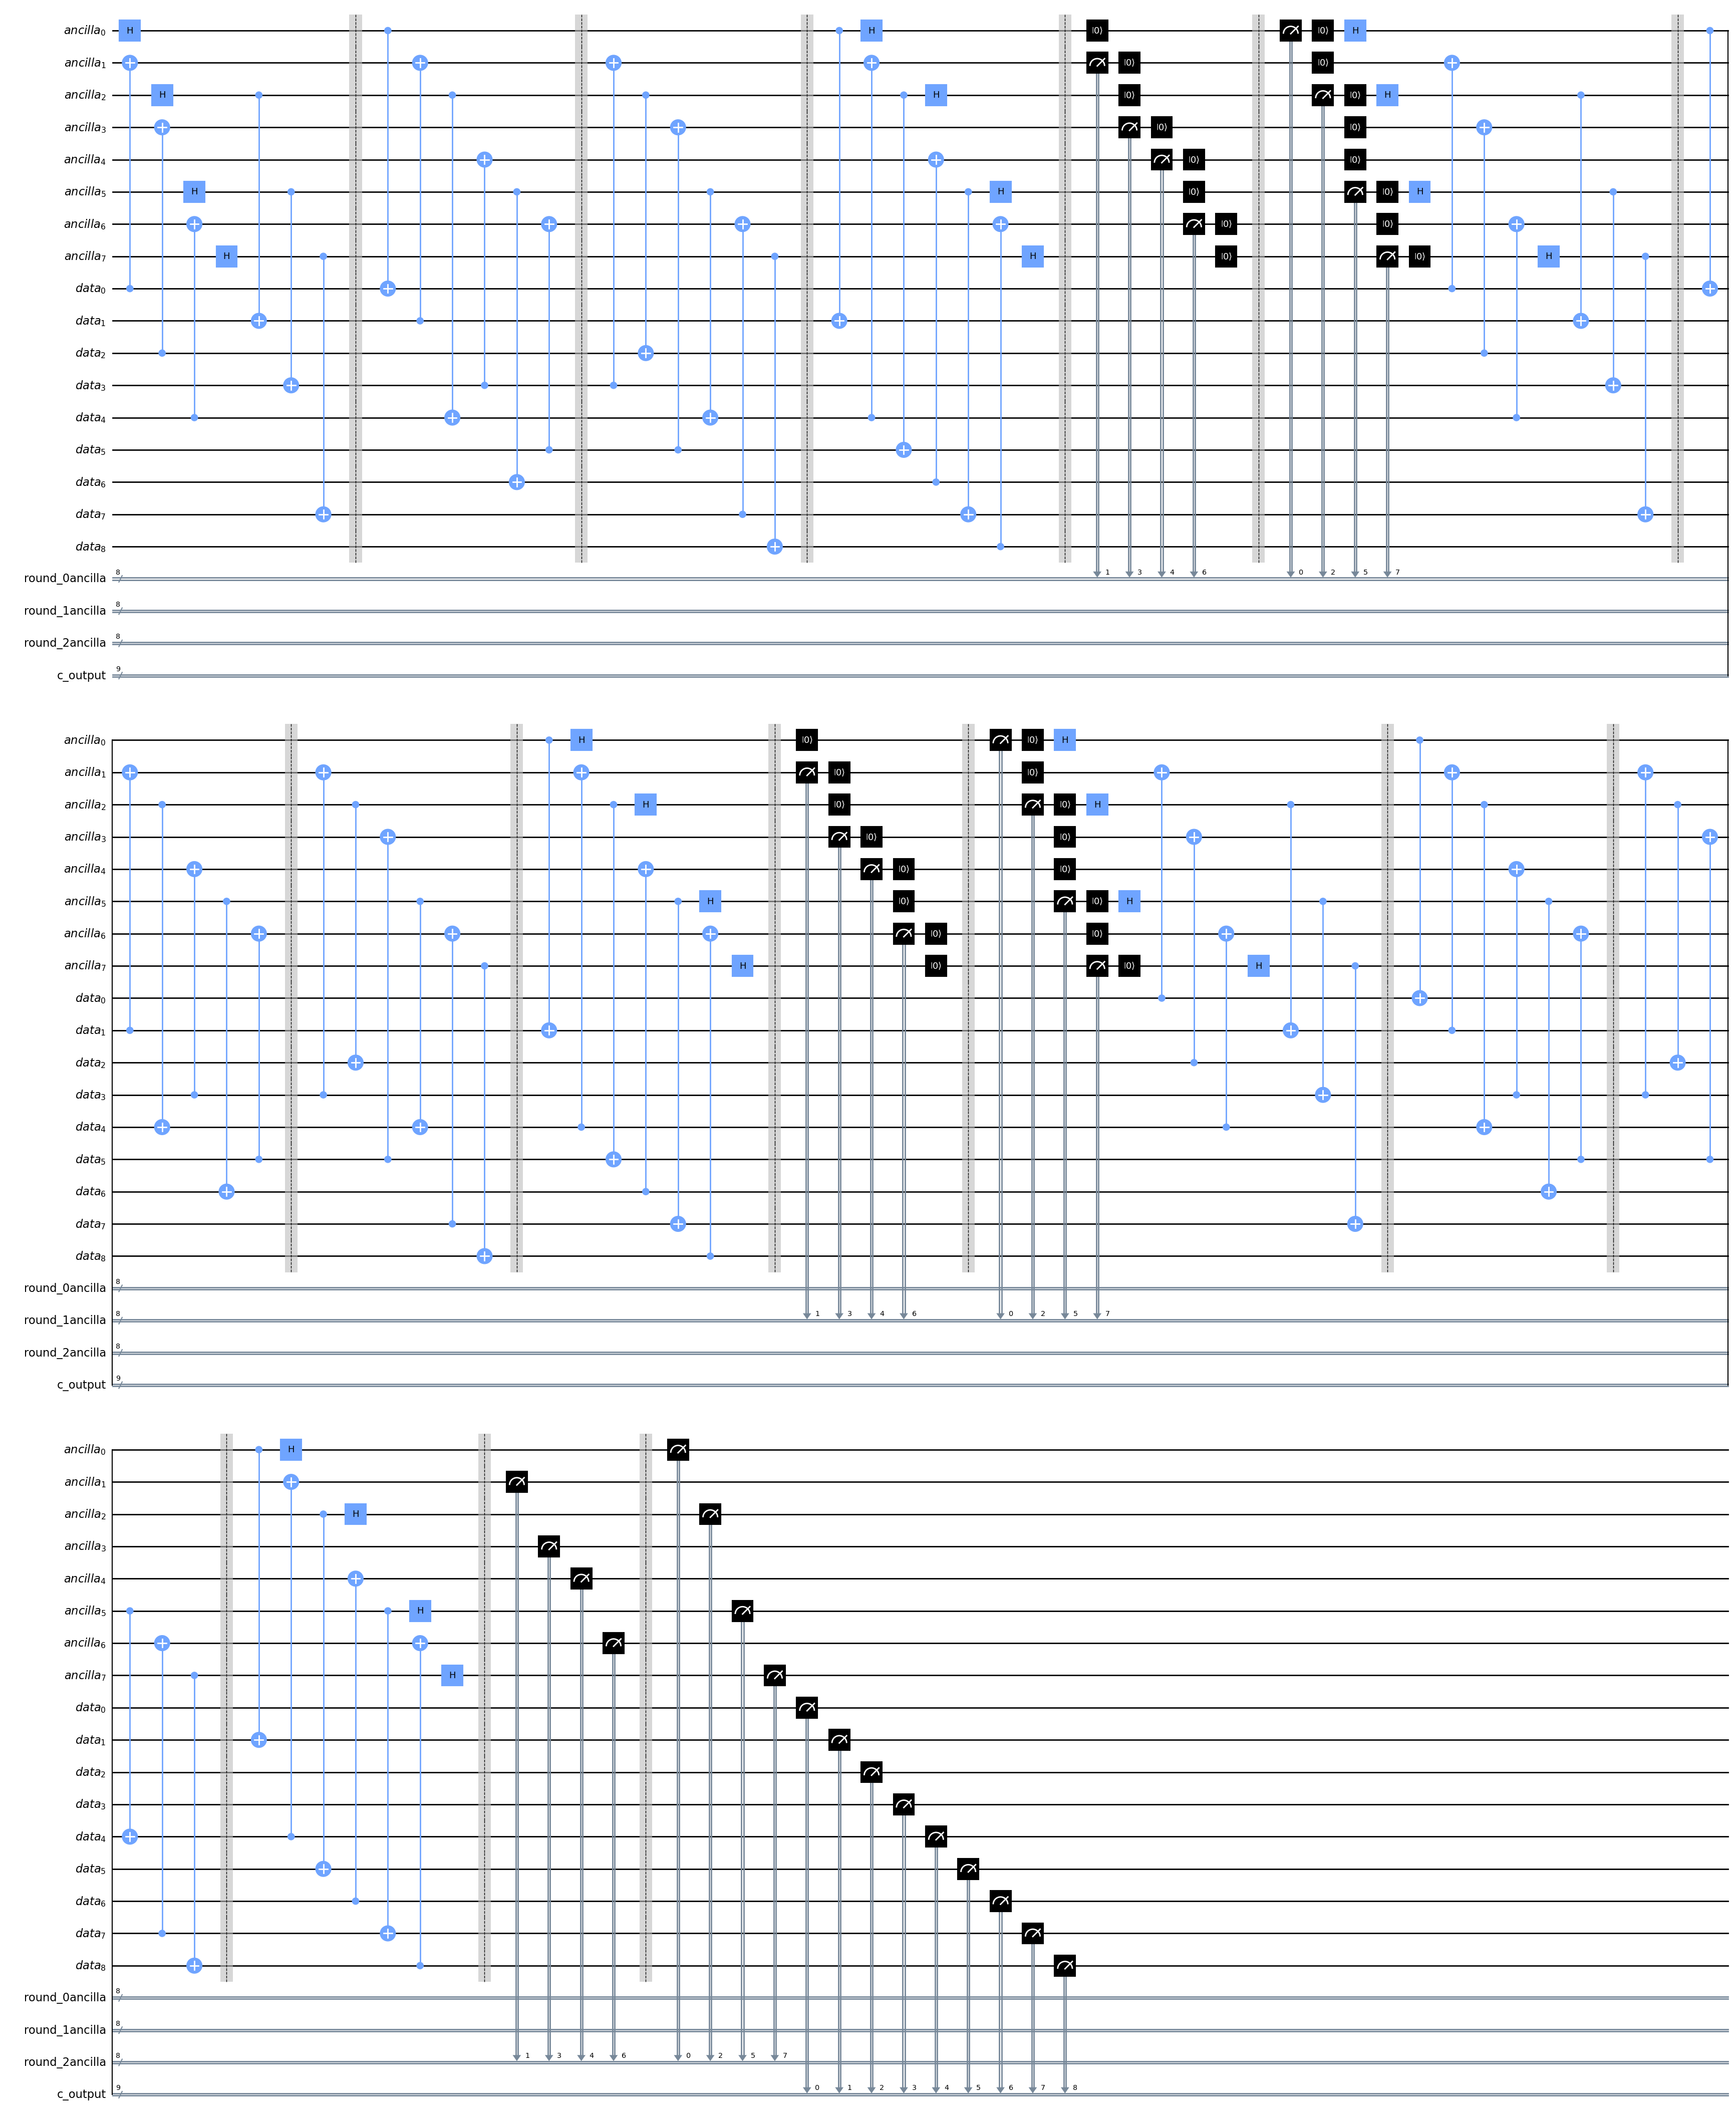

In [7]:
code.circuit["0"].draw(output='mpl', fold=50)